Ridge regression, similar to Lasso, is a regularization technique used for both feature selection and model fitting. It addresses multicollinearity (high correlation between features) by adding a penalty term to the ordinary least squares (OLS) regression objective function. The penalty term is proportional to the square of the coefficients, encouraging them to shrink towards zero. This shrinkage not only helps prevent overfitting but also reduces the impact of multicollinearity.

### Mathematical Formula:

#### The Ridge regression objective function is:

minimize ||y - Xβ||² + λ||β||₂²

###### ||y - Xβ||² is the residual sum of squares (the standard OLS objective)
###### λ||β||₂² is the Ridge penalty term
###### λ (lambda) is the regularization parameter that controls the strength of the penalty (higher lambda leads to stronger shrinkage)
###### ||β||₂² is the L2 norm of the coefficient vector β (the sum of the squares of the coefficients)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [7]:
# We select MinMaxScaled data, because it gives more accuracy and less loss, despite too little latencycompared to StandardScaling
df = pd.read_csv("C:/Users/DilshodbekMX/PycharmProjects/Cyber/Normalization/MinMaxScaling.csv", low_memory=False)
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [8]:
X = df.drop("Label", axis=1)  # Features
y = df["Label"]

In [9]:
# Store original column names
original_columns = X.columns

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
sel_ = SelectFromModel(Ridge(alpha=0.1))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Ridge(alpha=0.1))

In [37]:
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True])

In [38]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 78
selected features: 22
features with coefficients shrank to zero: 0


In [39]:
# Get the selected feature names
selected_features = original_columns[sel_.get_support()]
selected_features

Index(['Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Flow Byts/s', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Bwd IAT Mean', 'Bwd IAT Max', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Fwd Seg Size Avg',
       'Bwd Seg Size Avg', 'Idle Std', 'Idle Max', 'Idle Min'],
      dtype='object')

In [40]:
# Identify dropped columns
dropped_columns = original_columns.difference(selected_features)

print("Dropped Columns:")
print(dropped_columns)

Dropped Columns:
Index(['ACK Flag Cnt', 'Active Max', 'Active Mean', 'Active Min', 'Active Std',
       'Bwd Header Len', 'Bwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Tot',
       'Bwd PSH Flags', 'Bwd Pkt Len Std', 'Bwd Pkts/s', 'CWE Flag Count',
       'Down/Up Ratio', 'Dst IP', 'Dst Port', 'ECE Flag Cnt', 'FIN Flag Cnt',
       'Flow Duration', 'Flow IAT Mean', 'Flow ID', 'Flow Pkts/s',
       'Fwd Act Data Pkts', 'Fwd Header Len', 'Fwd IAT Max', 'Fwd IAT Mean',
       'Fwd IAT Min', 'Fwd IAT Std', 'Fwd IAT Tot', 'Fwd PSH Flags',
       'Fwd Pkts/s', 'Fwd Seg Size Min', 'Idle Mean', 'Init Bwd Win Byts',
       'Init Fwd Win Byts', 'PSH Flag Cnt', 'Pkt Len Min', 'Pkt Size Avg',
       'Protocol', 'RST Flag Cnt', 'SYN Flag Cnt', 'Src IP', 'Src Port',
       'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts',
       'Subflow Fwd Pkts', 'Timestamp', 'Tot Bwd Pkts', 'Tot Fwd Pkts',
       'TotLen Bwd Pkts', 'TotLen Fwd Pkts', 'URG Flag Cnt', 'Unnamed: 0',
       'Unnamed: 0.1', 'Unname

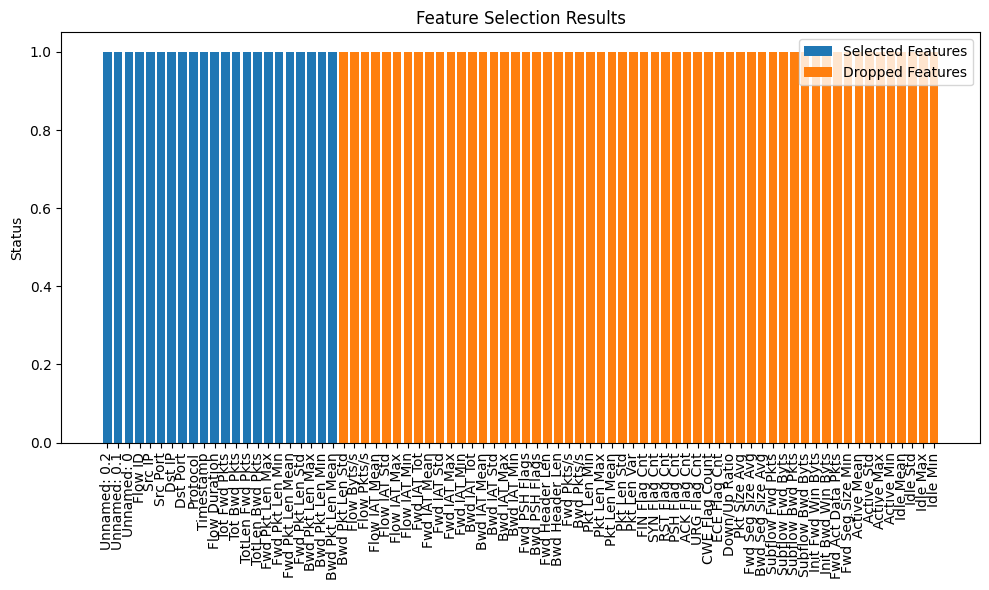

In [41]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feat)), np.ones(len(selected_feat)), label='Selected Features')
plt.bar(range(len(selected_features), len(original_columns)), np.ones(len(dropped_columns)), label='Dropped Features')
plt.xticks(range(len(original_columns)), original_columns, rotation=90)
plt.ylabel('Status')
plt.title('Feature Selection Results')
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
# Filter columns based on the selected features list
df_selected = df[[col for col in df.columns if col in list(selected_features)]]

(df_selected) 

,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Flow Byts/s,Flow IAT Std,Flow IAT Max,...,Bwd IAT Max,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,Fwd Seg Size Avg,Bwd Seg Size Avg,Idle Std,Idle Max,Idle Min
0,0.044461,0.000000,0.020035,0.040836,0.201657,0.000000,0.116214,6.676626e-08,0.050253,0.083439,...,0.084189,0.121333,0.103969,0.139883,0.019567,0.020035,0.116214,0.001615,0.083439,0.081228
1,0.003574,0.029452,0.013879,0.000000,0.015608,0.054722,0.051639,8.287964e-05,0.000000,0.000015,...,0.000000,0.009391,0.046253,0.014614,0.000214,0.013879,0.051639,0.000000,0.000000,0.000000
2,0.162304,0.000000,0.096874,0.177271,0.391713,0.000000,0.115361,1.127869e-07,0.050075,0.083531,...,0.084039,0.235685,0.188461,0.224791,0.050531,0.096874,0.115361,0.021086,0.083531,0.043356
3,0.077703,0.000000,0.075450,0.127959,0.048757,0.000000,0.040329,2.811327e-07,0.019346,0.036297,...,0.036367,0.077703,0.099788,0.115381,0.013313,0.075450,0.040329,0.000000,0.000000,0.000000
4,0.056262,0.000000,0.041172,0.059858,0.162017,0.000000,0.103213,1.402604e-06,0.002852,0.007948,...,0.007963,0.097482,0.111934,0.112836,0.012732,0.041172,0.103213,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,0.077703,0.000000,0.075450,0.127959,0.037707,0.000000,0.041585,3.044196e-05,0.000179,0.000312,...,0.000312,0.077703,0.105289,0.119645,0.014315,0.075450,0.041585,0.000000,0.000000,0.000000
172005,0.002493,0.020548,0.009683,0.000000,0.018232,0.063923,0.060322,1.155892e-05,0.000000,0.000113,...,0.000000,0.010970,0.044626,0.021295,0.000453,0.009683,0.060322,0.000000,0.000000,0.000000
172006,0.077703,0.000000,0.075450,0.127959,0.048204,0.000000,0.053162,1.081377e-03,0.000003,0.000005,...,0.000005,0.077703,0.111913,0.121473,0.014756,0.075450,0.053162,0.000000,0.000000,0.000000
172007,0.016289,0.000000,0.014798,0.018822,0.197514,0.000000,0.154834,3.573522e-08,0.197241,0.484614,...,0.486841,0.118840,0.120574,0.141304,0.019967,0.014798,0.154834,0.000647,0.484614,0.484112


In [44]:
df_selected.to_csv("RidgeSelection.csv")